In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.head()


,AC,Fan,Cooler,Sales
0,323.0,56.7,45.7,23.5
1,65.5,34.6,87.7,76.7
2,45.6,87.8,98.6,65.7
3,23.6,123.5,34.6,87.6
4,98.6,67.0,87.0,56.7


In [ ]:
advertising.shape

(9, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      9 non-null      float64
 1   Fan     9 non-null      float64
 2   Cooler  9 non-null      float64
 3   Sales   9 non-null      float64
dtypes: float64(4)
memory usage: 416.0 bytes


In [ ]:
advertising.describe()

,AC,Fan,Cooler,Sales
count,9.000000,9.000000,9.000000,9.000000
mean,84.422222,67.633333,69.655556,66.055556
std,94.038274,29.759158,27.703073,22.453013
min,12.400000,23.500000,34.600000,23.500000
25%,34.600000,56.700000,45.700000,56.700000
50%,65.500000,67.000000,87.000000,65.700000
75%,90.800000,80.800000,90.000000,76.700000
max,323.000000,123.500000,98.700000,97.700000


In [ ]:
advertising.isnull().sum()*100/advertising.shape[0]

AC        0.0
Fan       0.0
Cooler    0.0
Sales     0.0
dtype: float64

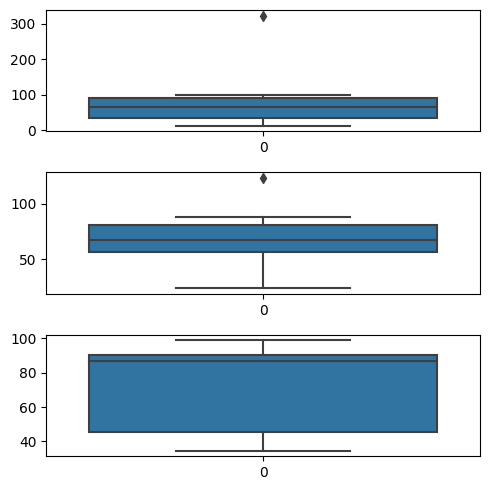

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['AC'], ax = axs[0])
plt2 = sns.boxplot(advertising['Fan'], ax = axs[1])
plt3 = sns.boxplot(advertising['Cooler'], ax = axs[2])
plt.tight_layout()

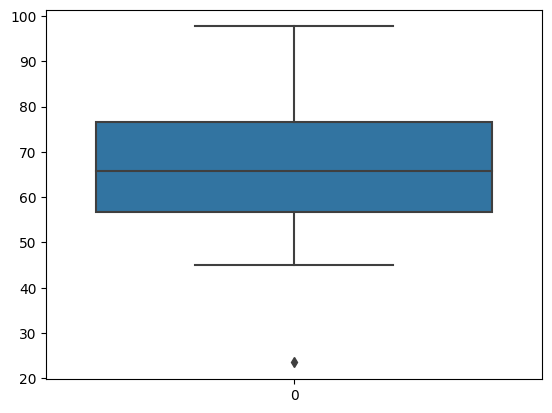

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()
     


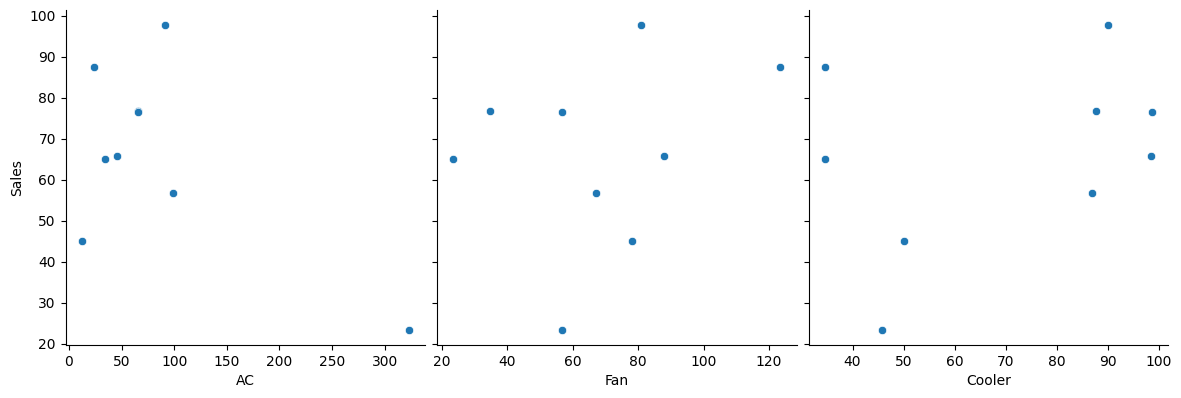

In [ ]:
sns.pairplot(advertising, x_vars=['AC', 'Fan', 'Cooler'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

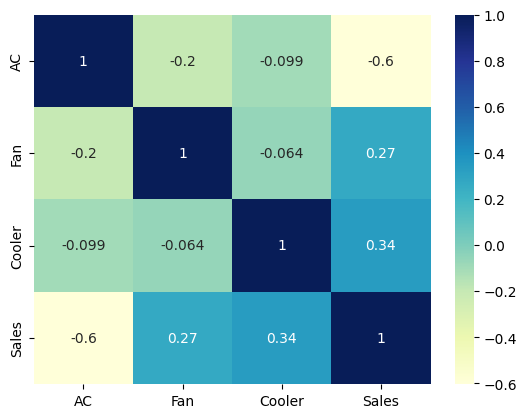

In [ ]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
X = advertising['AC']
y = advertising['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

4     98.6
2     45.6
7     65.7
3     23.6
0    323.0
Name: AC, dtype: float64

In [ ]:
y_train.head()

4    56.7
2    65.7
7    76.6
3    87.6
0    23.5
Name: Sales, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const    89.477127
AC       -0.199386
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     8.657
Date:                Mon, 08 May 2023   Prob (F-statistic):             0.0423
Time:                        07:19:35   Log-Likelihood:                -24.124
No. Observations:                   6   AIC:                             52.25
Df Residuals:                       4   BIC:                             51.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.4771      9.946      8.996      0.0

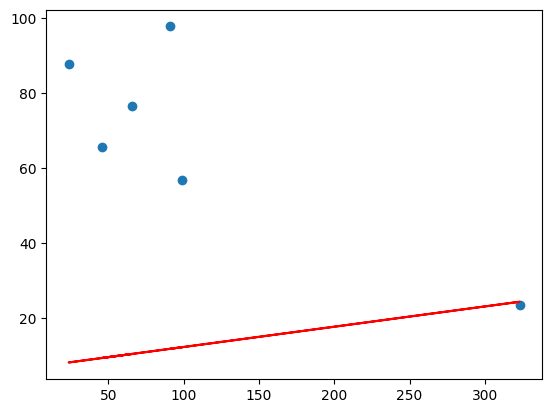

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
     

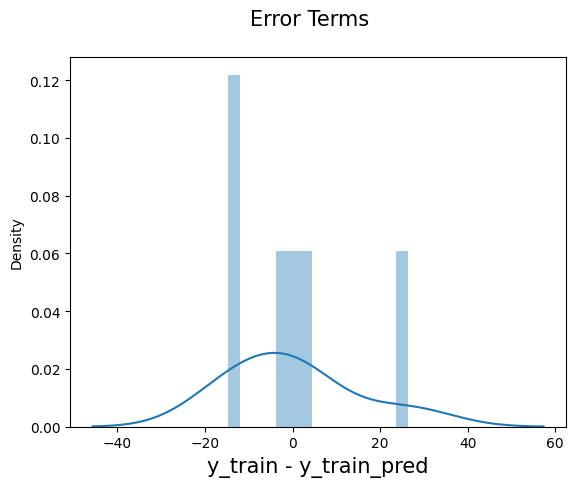

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

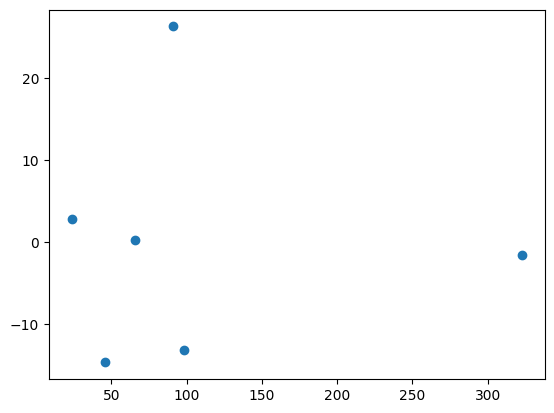

In [ ]:
plt.scatter(X_train,res)
plt.show()
     

In [ ]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

1    76.417323
6    82.578361
5    87.004737
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

26.289900329034683

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

-3.0345767449280707

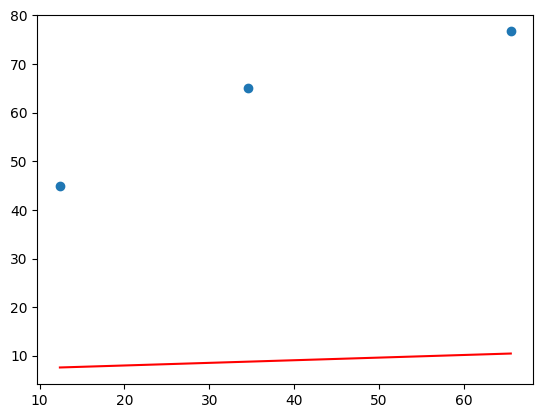

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()